In [8]:
import numpy as np
from scipy.integrate import solve_ivp
from pysindy.utils import lorenz
import pysindy as ps
import matplotlib.pyplot as plt

# Integrator keywords for solve_ivp
integrator_keywords = {}
integrator_keywords['rtol'] = 1e-12
integrator_keywords['method'] = 'LSODA'
integrator_keywords['atol'] = 1e-12

# Short-time performance

## Train

In [32]:
dt = 0.001
T = 1.5
t_train = np.arange(0, T, dt)
t_train_span = (t_train[0], t_train[-1])
x0_train = [10., 15., 17.] 
x_train = solve_ivp(lorenz, t_train_span, 
                    x0_train, t_eval=t_train, **integrator_keywords).y.T
x_dot_train_measured = np.array(
    [lorenz(0, x_train[i]) for i in range(t_train.size)]
)

In [33]:
poly_order = 5
threshold = 0.02
eps = 0.
models = []

In [34]:
model = ps.SINDy(
        optimizer=ps.STLSQ(threshold=threshold),
        feature_library=ps.PolynomialLibrary(degree=poly_order),
    )
model.fit(
        x_train,
        t=dt,
        x_dot=x_dot_train_measured
        + np.random.normal(scale=eps, size=x_train.shape),
        quiet=True,
    )
models.append(model)

In [35]:
model.print() 

(x0)' = -10.000 x0 + 10.000 x1
(x1)' = 28.000 x0 + -1.000 x1 + -1.000 x0 x2
(x2)' = -2.667 x2 + 1.000 x0 x1


## Prediction

In [36]:
dt = 0.01
T = 3
t_train = np.arange(0, T, dt)
t_train_span = (t_train[0], t_train[-1])
x_train = solve_ivp(lorenz, t_train_span, 
                    x0_train, t_eval=t_train, **integrator_keywords).y.T

t_sim = np.arange(0, T, dt)
x_sim = []
x_sim.append(model.simulate(x_train[0], t_sim))

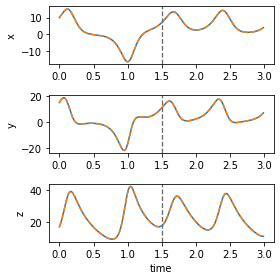

In [37]:
fig = plt.figure(figsize=(4, 4))
model_idx = 0
ax = fig.add_subplot(311)
ax.plot(t_sim, x_train[: t_sim.size, 0], '-', label=r'true')
ax.plot(t_sim, x_sim[model_idx][:, 0], '--',label=r'pred')
ax.axvline(x=1.5, color='dimgrey', linewidth=1.3, linestyle='--')
#plt.title(f"$\eta$={noise_levels[model_idx]:.2f}")
plt.ylabel("x")

ax = fig.add_subplot(312)
ax.plot(t_sim, x_train[: t_sim.size, 1], '-', label=r'true')
ax.plot(t_sim, x_sim[model_idx][:, 1], '--',label=r'pred')
ax.axvline(x=1.5, color='dimgrey', linewidth=1.3, linestyle='--')
plt.ylabel("y")

ax = fig.add_subplot(313)
ax.plot(t_sim, x_train[: t_sim.size, 2], '-', label=r'true')
ax.plot(t_sim, x_sim[model_idx][:, 2], '--',label=r'pred')
ax.axvline(x=1.5, color='dimgrey', linewidth=1.3, linestyle='--')
plt.xlabel("time")
plt.ylabel("z")

plt.tight_layout()
plt.savefig('plots/SIND_T3_dt00001_dx_w', dpi=300)

In [9]:
np.mean((x_train-x_sim[model_idx])**2)

108.22588227844066

# Long-time performance

## Train

In [38]:
dt = 0.01
T = 20
x0_train = [-8., 8., 27.]
t_train = np.arange(0, T, dt)
t_train_span = (t_train[0], t_train[-1])
x_train = solve_ivp(lorenz, t_train_span, 
                    x0_train, t_eval=t_train, **integrator_keywords).y.T
x_dot_train_measured = np.array(
    [lorenz(0, x_train[i]) for i in range(t_train.size)]
)

In [39]:
poly_order = 5
threshold = 0.02
eps = 0.
models = []

In [40]:
model = ps.SINDy(
        optimizer=ps.STLSQ(threshold=threshold),
        feature_library=ps.PolynomialLibrary(degree=poly_order),
    )
model.fit(
        x_train,
        t=dt,
#         x_dot=x_dot_train_measured
#         + np.random.normal(scale=eps, size=x_train.shape),
        quiet=True,
    )
models.append(model)

In [41]:
model.print() 

(x0)' = -9.979 x0 + 9.979 x1
(x1)' = 27.811 x0 + -0.965 x1 + -0.995 x0 x2
(x2)' = -2.659 x2 + 0.997 x0 x1


## Prediction

In [42]:
dt = 0.01
T = 20

t_train = np.arange(0, T, dt)
t_train_span = (t_train[0], t_train[-1])
x_train = solve_ivp(lorenz, t_train_span, 
                    x0_train, t_eval=t_train, **integrator_keywords).y.T

t_sim = np.arange(0, T, dt)
x_sim = []
x_sim.append(model.simulate(x_train[0], t_sim))

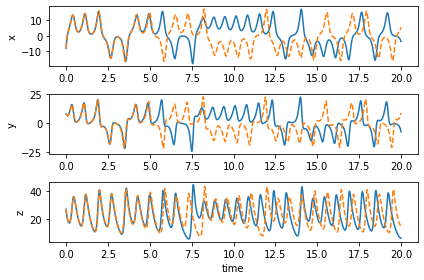

In [43]:
fig = plt.figure(figsize=(6, 4))
model_idx = 0
ax = fig.add_subplot(311)
ax.plot(t_sim, x_train[: t_sim.size, 0], '-', label=r'true')
ax.plot(t_sim, x_sim[model_idx][:, 0], '--',label=r'pred')
#plt.title(f"$\eta$={noise_levels[model_idx]:.2f}")
plt.ylabel("x")

ax = fig.add_subplot(312)
ax.plot(t_sim, x_train[: t_sim.size, 1], '-', label=r'true')
ax.plot(t_sim, x_sim[model_idx][:, 1], '--',label=r'pred')
plt.ylabel("y")

ax = fig.add_subplot(313)
ax.plot(t_sim, x_train[: t_sim.size, 2], '-', label=r'true')
ax.plot(t_sim, x_sim[model_idx][:, 2], '--',label=r'pred')
plt.xlabel("time")
plt.ylabel("z")

plt.tight_layout()
#plt.savefig('plots/SINDy_Lorenz', dpi=300)

In [22]:
np.mean((x_train-x_sim[model_idx])**2)

124.02103798651986